In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import networkx as nx
import itertools

In [7]:
names_control = ["right-center", "center", "left", "left-center", "right"]
names = ["Alt-right", "IDW", "Alt-lite", "control"]
names_list_list = [["Alt-right"], ["IDW"], ["Alt-lite"], names_control]
bins_like_name = ["0", "1", "2-5", "6-100", "100"]
lines = ['-', '--', '-.', ':', '-', '-.', ':']
df_path = "./../data/sentiment/dataframes/"
img_path = "./../imgs/"


# TextBlob

In [115]:
blob_df_path = df_path + "text_blob_df/like/"
pol = []
subj = []
#for name in names:
#    pol.append(pd.read_csv(f"{blob_df_path}{name}_pol.csv"))
#    subj.append(pd.read_csv(f"{blob_df_path}{name}_subj.csv"))

### Mean

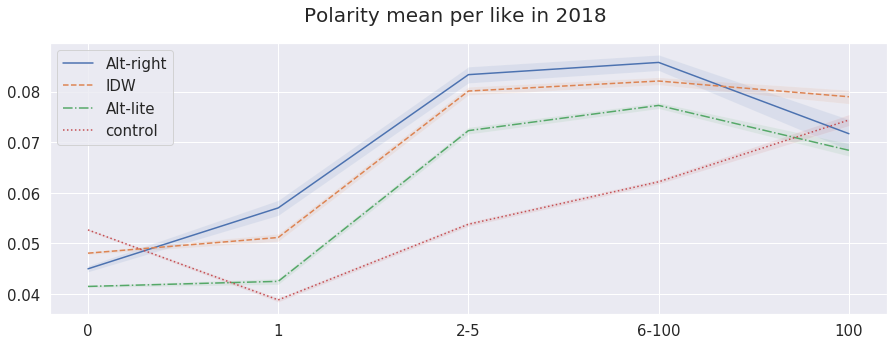

In [123]:
fig, ax = plt.subplots(1, 1, figsize=[15, 5],  squeeze=False)
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.3)
c=0
for like_name in bins_like_name:
    perspective[like_name] = []
    for name in names:
        perspective[like_name].append(pd.read_csv(f"{blob_df_path}{name}{like_name}_pol.csv").iloc[2])
plt.suptitle(f"Polarity mean per like in 2018", fontsize=20)
for i in range(len(names)):
    y = []
    y_dyd = []
    y_dyu = []
    for like in bins_like_name:
        y.append(perspective[like][i].y)
        y_dyd.append(perspective[like][i]["dyd"])
        y_dyu.append(perspective[like][i]["dyu"])

    ax[c%3, c//3].plot(bins_like_name, y, lines[i])
    ax[c%3, c//3].fill_between(bins_like_name, y_dyd,y_dyu, alpha=0.1)
ax[c%3, c//3].legend(names, prop={'size': 15})
ax[c%3, c//3].tick_params(axis='both', labelsize=15)

plt.savefig(f"{img_path}textblob/like/blob_mean_2018.png", bbox_inches = 'tight')

# Empath

In [4]:
emotion_list = ['love', 'ridicule', 'masculine', 'feminine',
                'violence','anger','politics', 'terrorism','hate']
empath = []
empath_df_path = df_path + "empath_df/like/"
#for name in names:
#    empath.append(pd.read_csv(f"{empath_df_path}{name}_empath.csv"))

### Mean

In [5]:
bins_t_s = [ "2016", "2017", "2018"]


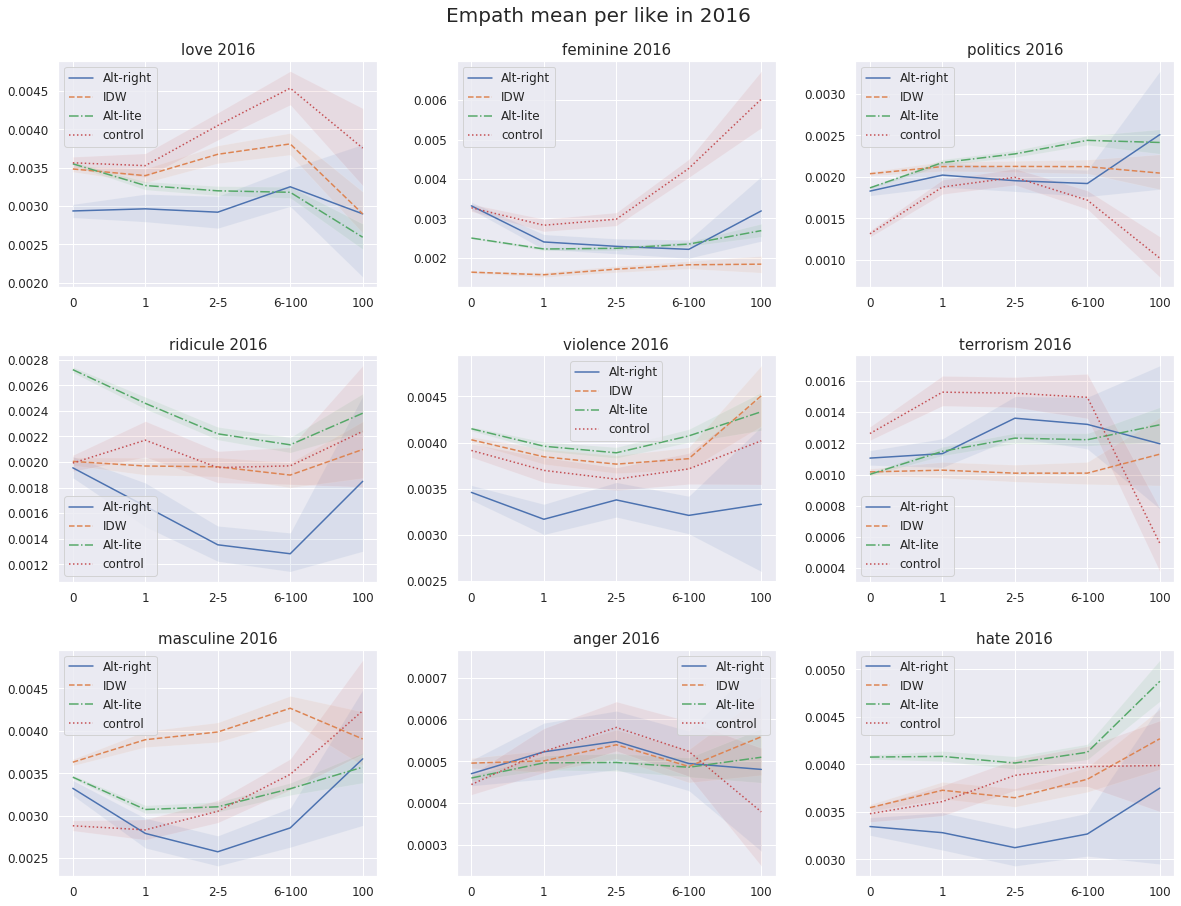

In [23]:
perspective = {}
fig, ax = plt.subplots(3, 3, figsize=[20, 15],  squeeze=False)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.25)

c=0
for like_name in bins_like_name:
    perspective[like_name] = []
    for name in names:
        perspective[like_name].append(pd.read_csv(f"{empath_df_path}{name}{like_name}_empath_new.csv").iloc[0])
plt.suptitle(f"Empath mean per like in 2016", fontsize=20, y=0.93)
for emotion in emotion_list:
    #ax[c//1, c%1].set_ylim([0.135,0.43])
    ax[c%3, c//3].set_title(emotion + " " + bins_t_s[0], fontsize=15)
    for i in range(len(names)):
        y = []
        y_dyd = []
        y_dyu = []
        for like in bins_like_name:
            y.append(perspective[like][i][emotion])
            y_dyd.append(perspective[like][i][emotion + "_dyd"])
            y_dyu.append(perspective[like][i][emotion + "_dyu"])

        ax[c%3, c//3].plot(bins_like_name, y, lines[i])
        ax[c%3, c//3].fill_between(bins_like_name, y_dyd,y_dyu, alpha=0.1)
    ax[c%3, c//3].legend(names, prop={'size': 12})
    ax[c%3, c//3].tick_params(axis='both', labelsize=12)

    c+=1
plt.savefig(f"{img_path}empath/like/empath_mean_like_2016.png", bbox_inches = 'tight')

# Polarity with Empath

In [24]:
y = []
emp_pol_df_path = df_path + "empath_blob_df/like/"
#for name in names:
#    y.append(pd.read_csv(f"{emp_pol_df_path}{name}_pol_empath_prop_boots.csv"))

### Mean

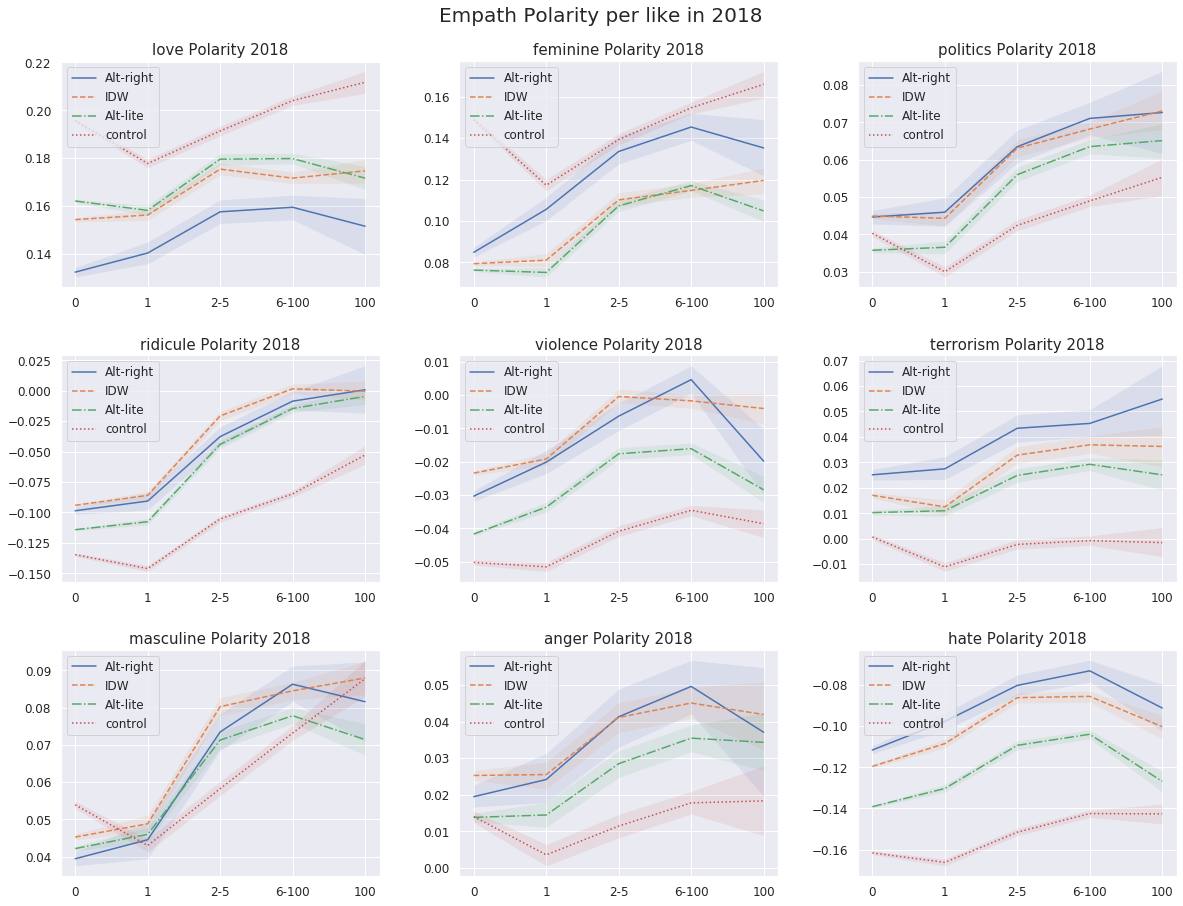

In [32]:
fig, ax = plt.subplots(3, 3, figsize=[20, 15],  squeeze=False)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.25)
c=0
for like_name in bins_like_name:
    perspective[like_name] = []
    for name in names:
        perspective[like_name].append(pd.read_csv(f"{emp_pol_df_path}{name}{like_name}_pol_empath_like.csv").iloc[2])
plt.suptitle(f"Empath Polarity per like in 2018", fontsize=20, y=0.93)
for emotion in emotion_list:
    #ax[c//1, c%1].set_ylim([0.135,0.43])
    ax[c%3, c//3].set_title(emotion + " Polarity " + bins_t_s[2], fontsize=15)
    for i in range(len(names)):
        y = []
        y_dyd = []
        y_dyu = []
        for like in bins_like_name:
            y.append(perspective[like][i][emotion])
            y_dyd.append(perspective[like][i][emotion + "_dyd"])
            y_dyu.append(perspective[like][i][emotion + "_dyu"])

        ax[c%3, c//3].plot(bins_like_name, y, lines[i])
        ax[c%3, c//3].fill_between(bins_like_name, y_dyd,y_dyu, alpha=0.1)
    ax[c%3, c//3].legend(names, prop={'size': 12})
    ax[c%3, c//3].tick_params(axis='both', labelsize=12)

    c+=1
plt.savefig(f"{img_path}empath_blob/like/polarity_empath_like_2018.png", bbox_inches = 'tight')

# Perspective

In [35]:
attributes = ['TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK']
persp_df_path = df_path + "perspective_df/like/"
bins_like_name = ["0", "1", "2-5", "6-100", "100"]
bins_t_s = ["2016", "2017", "2018"]
perspective = {}

for like_name in bins_like_name:
    perspective[like_name] = []
    for name in names:
        perspective[like_name].append(pd.read_csv(f"{persp_df_path}{name}{like_name}_perspective_new.csv").iloc[0])

### Mean with one like

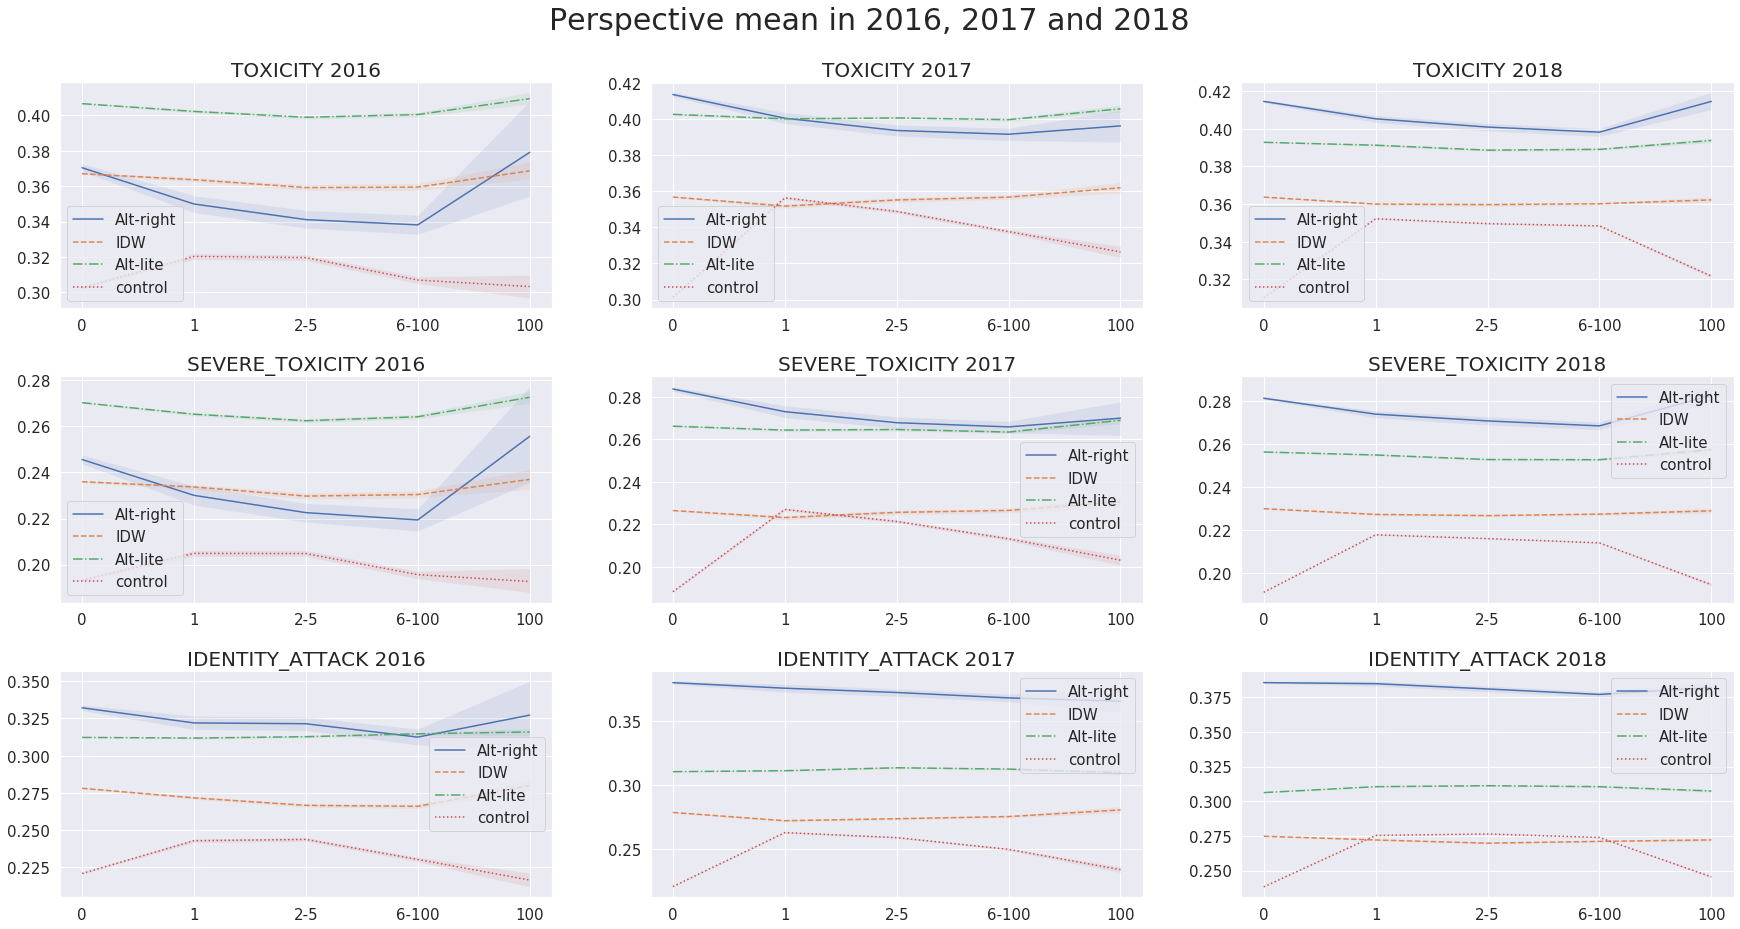

In [39]:
fig, ax = plt.subplots(3, 3, figsize=[30, 15],  squeeze=False)
plt.subplots_adjust(hspace=0.3)
c=0
for year in range(len(bins_t_s)):
    for like_name in bins_like_name:
        perspective[like_name] = []
        for name in names:
            perspective[like_name].append(pd.read_csv(f"{persp_df_path}{name}{like_name}_perspective_new.csv").iloc[year])

    plt.suptitle(f"Perspective mean in 2016, 2017 and 2018", fontsize=30, y=0.95)
    for emotion in attributes:
        #ax[c//1, c%1].set_ylim([0.135,0.43])
        ax[c%3, c//3].set_title(emotion + " " + bins_t_s[year], fontsize=20)
        for i in range(len(names)):
            y = []
            y_dyd = []
            y_dyu = []
            for like in bins_like_name:
                y.append(perspective[like][i][emotion])
                y_dyd.append(perspective[like][i][emotion + "_dyd"])
                y_dyu.append(perspective[like][i][emotion + "_dyu"])

            ax[c%3, c//3].plot(bins_like_name, y, lines[i])
            ax[c%3, c//3].fill_between(bins_like_name, y_dyd,y_dyu, alpha=0.1)
        ax[c%3, c//3].legend(names, prop={'size': 15})
        ax[c%3, c//3].tick_params(axis='both', labelsize=15)

        c+=1
plt.savefig(f"{img_path}perspective/like/perspective.png")    